**Work_8_classification**

In [1]:
import json
import os

# Installing the Kaggle package
!pip install kaggle 

!mkdir /root/.kaggle/ 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"avielbbaz","key":"b9e35e8b71e0611fbd90b49b45fde304"}


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [3]:
!mkdir ./datasets
!mkdir ./datasets/Diamonds
!mkdir ./datasets/fifa

In [12]:
!kaggle datasets download -d shivam2503/diamonds -p ./datasets/Diamonds
!unzip ./datasets/Diamonds*.zip -d ./datasets/Diamonds
!ls ./datasets/Diamonds

  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 112MB/s]
unzip:  cannot find or open ./datasets/Diamonds*.zip, ./datasets/Diamonds*.zip.zip or ./datasets/Diamonds*.zip.ZIP.

No zipfiles found.
diamonds.zip


In [4]:
!kaggle datasets download -d sanjeetsinghnaik/fifa-23-players-dataset -p ./datasets/fifa
!unzip ./datasets/fifa*.zip -d ./datasets/fifa
!ls ./datasets/fifa

  0% 0.00/2.25M [00:00<?, ?B/s]
100% 2.25M/2.25M [00:00<00:00, 108MB/s]
unzip:  cannot find or open ./datasets/fifa*.zip, ./datasets/fifa*.zip.zip or ./datasets/fifa*.zip.ZIP.

No zipfiles found.
fifa-23-players-dataset.zip


In [13]:
diamond_df = pd.read_csv('/content/datasets/Diamonds/diamonds.zip')

Part 1 - Diamonds

In [14]:
diamond_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Q1

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
x_train, x_test, y_train, y_test = train_test_split(diamond_df[['x','y','table','depth','carat','price']],diamond_df['cut'], test_size=0.2, random_state=1)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(x_train, y_train)
y_predict_3 = knn_3.predict(x_test)
accuracy_3 = accuracy_score(y_test, y_predict_3)
f1_3 = f1_score(y_test, y_predict_3, average='weighted')
print("The accuracy score for the KNN classifcation is: %.3f" % accuracy_3)
print("The f1 score for the KNN classifcation is: %.3f " % f1_3)

The accuracy score for the KNN classifcation is: 0.549
The f1 score for the KNN classifcation is: 0.531 


Q2

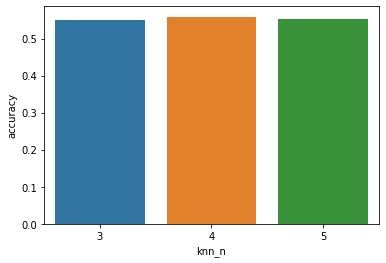

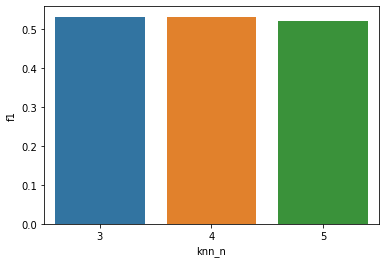

In [16]:
knn_4 = KNeighborsClassifier(n_neighbors = 4)
knn_4.fit(x_train, y_train)
y_predict_4 = knn_4.predict(x_test)
accuracy_4 = accuracy_score(y_test, y_predict_4)
f1_4 = f1_score(y_test, y_predict_4, average='weighted')
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(x_train, y_train)
y_predict_5 = knn_5.predict(x_test)
accuracy_5 = accuracy_score(y_test, y_predict_5)
f1_5 = f1_score(y_test, y_predict_5, average='weighted')
list_of_knn_types = [3, 4, 5]
list_of_accuracy = [accuracy_3, accuracy_4, accuracy_5]
list_of_f1 = [f1_3, f1_4, f1_5]
df_by_knn = pd.DataFrame({'knn_n':list_of_knn_types, 'accuracy': list_of_accuracy, 'f1': list_of_f1})
sns.barplot(x='knn_n', y='accuracy', data=df_by_knn)
plt.show()
sns.barplot(x='knn_n', y='f1', data=df_by_knn)
plt.show()

Q3

In [17]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Select the columns to encode
columns_to_encode = ['clarity', 'color']

# Fit the encoder to the dataframe
diamond_df[columns_to_encode] = diamond_df[columns_to_encode].apply(lambda col: le.fit_transform(col))

train_x, test_x, train_y, test_y = train_test_split(diamond_df[['x','y','table','depth','carat','price','color', 'clarity']],diamond_df['cut'],test_size=0.2, random_state=1) 
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_3.fit(train_x, train_y)
knn_4.fit(train_x, train_y)
knn_5.fit(train_x, train_y)
y_predict3 = knn_3.predict(test_x)
y_predict4 = knn_4.predict(test_x)
y_predict5 = knn_5.predict(test_x)

accuracy_knn3 = accuracy_score(test_y, y_predict3)
accuracy_knn4 = accuracy_score(test_y, y_predict4)
accuracy_knn5 = accuracy_score(test_y, y_predict5)

new_list_of_accuracy = [accuracy_knn3, accuracy_knn4, accuracy_knn5]
print(f'previous models accuracy: {list_of_accuracy}')
print(f'new models accuracy: {new_list_of_accuracy}')

print("\nwe can see that the models are worse than the models without colors and clarity, \nwe checked 1 instance of train_test_split, it is safe to assume that our observation remains true.")

previous models accuracy: [0.5494067482387839, 0.5585836114200964, 0.5523730070448647]
new models accuracy: [0.5259547645532072, 0.5361512791991101, 0.5380051909529107]

we can see that the models are worse than the models without colors and clarity, 
we checked 1 instance of train_test_split, it is safe to assume that our observation remains true.


Q4  predict clarity or cut???

In [18]:
def Diamond_knn_size_x_train(x_train_size):
  knn_5 = KNeighborsClassifier(n_neighbors=5)
  le = LabelEncoder()
  # Select the columns to encode
  columns_to_encode = ['clarity', 'color']
  # Fit the encoder to the dataframe
  diamond_df[columns_to_encode] = diamond_df[columns_to_encode].apply(lambda col: le.fit_transform(col))
  train_x, test_x, train_y, test_y = train_test_split(diamond_df[['x','y','table','depth','carat','price','color', 'clarity']],diamond_df['cut'],train_size= x_train_size, random_state=1)
  # making the test fixed (the same each time) like they asked in the question
  # test size always 10 because the highest amount of xtrain we need to check is 90%. there for we need the test to always be the other 10%.
  nope_x, test_x, nope_y, test_y = train_test_split(diamond_df[['x','y','table','depth','carat','price','color', 'clarity']],diamond_df['cut'],train_size= 0.9, random_state=1)

  knn_5.fit(train_x, train_y)
  y_predict = knn_5.predict(test_x)
  accuracy = accuracy_score(test_y, y_predict)
  return accuracy, x_train_size
# 5%,10%,50%,75%,90%,
dictionary = {'accuracy':[], 'x_train_percent_size': []}
for size in (0.05,0.1,0.5,0.75,0.9):
  accuracy, train_size = Diamond_knn_size_x_train(size)
  dictionary['accuracy'].append(accuracy)
  dictionary['x_train_percent_size'].append(train_size)
df = pd.DataFrame(dictionary)
display(df)
fig = px.bar(df, x= 'x_train_percent_size', y='accuracy', color='x_train_percent_size')
fig.show()

,accuracy,x_train_percent_size
0,0.382462,0.05
1,0.412866,0.10
2,0.505933,0.50
3,0.533927,0.75
4,0.547275,0.90


decision trees FIFA

In [20]:
fifa_23_df = pd.read_csv('/content/datasets/fifa/fifa-23-players-dataset.zip')
print(fifa_23_df.columns)
fifa_23_df

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


1. preprocessing

In [21]:
number_of_nans_in_dataframe = fifa_23_df.isnull().sum().sum()
# no nulls missing values in the data frame (number_of_nans_in_dataframe)
# noticed that missing values are denoted as "-"
# im lazy so im just going to let the catogarizer deal with it

# finding columns with none numeric values
cols = fifa_23_df.columns
numeric_cols = fifa_23_df._get_numeric_data().columns
none_numeric_data = list(set(cols) - set(numeric_cols))
print(fifa_23_df[none_numeric_data].iloc[:10].to_string())

# transforming the none numeric (catagorical) colums
columns_to_encode = none_numeric_data
le = LabelEncoder()
fifa_23_df[columns_to_encode] = fifa_23_df[columns_to_encode].apply(lambda col: le.fit_transform(col))
print(fifa_23_df[none_numeric_data].iloc[:10].to_string())

  Club Position            Club Name           Known As Attacking Work Rate  Nationality Preferred Foot National Team Position Best Position National Team Jersey Number Club Jersey Number                                        Image Link On Loan National Team Name Contract Until                     Full Name             National Team Image Link Defensive Work Rate Positions Played
0            RW  Paris Saint-Germain           L. Messi                 Low    Argentina           Left                     RW           CAM                          10                 30  https://cdn.sofifa.net/players/158/023/23_60.png       -          Argentina           2023                  Lionel Messi  https://cdn.sofifa.net/flags/ar.png                 Low               RW
1            CF       Real Madrid CF         K. Benzema              Medium       France          Right                     ST            CF                          19                  9  https://cdn.sofifa.net/players/165/153/23_6

2. train test division

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X = fifa_23_df.loc[:, fifa_23_df.columns != 'Best Position']
y = fifa_23_df['Best Position']
train_x, test_x, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=212876551)

3. training and evaluating

In [23]:
def get_tree_models(tuple_of_depth, features=X.columns):
  dict_models = {}
  for depth in tuple_of_depth:
    # model
    tree = DecisionTreeClassifier(random_state=212876551, max_depth=depth)
    # training
    tree.fit(train_x[features], train_y)
    # testing
    tree_predictions = tree.predict(test_x[features])
    # evaluating
    tree_accuracy = accuracy_score(test_y, tree_predictions)
    tree_f1 = f1_score(test_y, tree_predictions, average='weighted')
    tree_precision = precision_score(test_y, tree_predictions, average='weighted', labels=np.unique(tree_predictions))
    tree_recall = recall_score(test_y, tree_predictions, average='weighted')
    print(f'tree{depth} - accuracy: {tree_accuracy}, f1: {tree_f1}, presicion: {tree_precision}, recall: {tree_recall}')
    dict_models[depth] = tree
  return dict_models

dict_models = get_tree_models((3, 5, 7))


tree3 - accuracy: 0.49083063646170444, f1: 0.43198722656756794, presicion: 0.7062878686193415, recall: 0.49083063646170444
tree5 - accuracy: 0.6669363538295577, f1: 0.6364573661714585, presicion: 0.7860070512190548, recall: 0.6669363538295577
tree7 - accuracy: 0.7402912621359223, f1: 0.7293320551492785, presicion: 0.7593537793233148, recall: 0.7402912621359223


4. draw tree

[Text(0.5483695652173913, 0.9375, 'X[67] <= 38.5\ngini = 0.891\nsamples = 14831\nvalue = [1853, 2916, 1138, 50, 887, 1622, 693, 664, 164, 336\n729, 1146, 240, 338, 2055]'),
 Text(0.5396739130434782, 0.8125, 'X[5] <= 643.5\ngini = 0.878\nsamples = 13209\nvalue = [1853, 2916, 1138, 50, 887, 0, 693, 664, 164, 336\n729, 1146, 240, 338, 2055]'),
 Text(0.2782608695652174, 0.6875, 'X[5] <= 88.5\ngini = 0.867\nsamples = 11221\nvalue = [1783, 2915, 1138, 30, 885, 0, 693, 659, 160, 336\n729, 1120, 206, 338, 229]'),
 Text(0.1391304347826087, 0.5625, 'X[5] <= 56.5\ngini = 0.413\nsamples = 3453\nvalue = [637, 2566, 45, 4, 18, 0, 1, 31, 5, 0, 10, 95\n14, 1, 26]'),
 Text(0.06956521739130435, 0.4375, 'X[48] <= 71.5\ngini = 0.392\nsamples = 828\nvalue = [637, 0, 2, 4, 18, 0, 0, 31, 5, 0, 0, 93, 14\n0, 24]'),
 Text(0.034782608695652174, 0.3125, 'X[54] <= 73.5\ngini = 0.291\nsamples = 514\nvalue = [431, 0, 2, 4, 17, 0, 0, 9, 1, 0, 0, 32, 2, 0\n16]'),
 Text(0.017391304347826087, 0.1875, 'X[9] <= 192.5\ngi

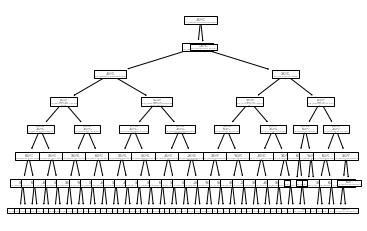

In [24]:
from sklearn import tree
tree.plot_tree(dict_models[7])

5. feature selection A.

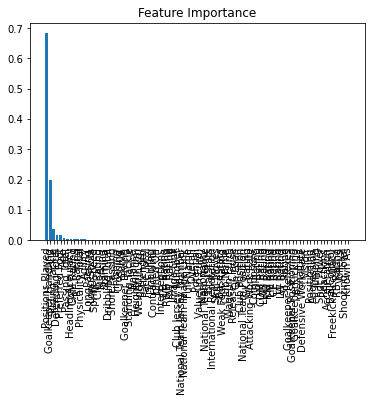

Index(['Positions Played', 'Goalkeeper Handling', 'Sliding Tackle',
       'Defending Total', 'Preferred Foot', 'Age', 'Passing Total',
       'Heading Accuracy', 'CAM Rating', 'RF Rating'],
      dtype='object')
tree3 - accuracy: 0.49083063646170444, f1: 0.43198722656756794, presicion: 0.7062878686193415, recall: 0.49083063646170444
tree5 - accuracy: 0.6669363538295577, f1: 0.6366214761120678, presicion: 0.7859219712164134, recall: 0.6669363538295577
tree7 - accuracy: 0.7454153182308522, f1: 0.7318385169946826, presicion: 0.7646630295995389, recall: 0.7454153182308522


In [29]:
from operator import ge
import numpy as np
model = dict_models[7]

# Get feature importances from the model
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_x.shape[1]), names, rotation=90)

# Show plot
plt.show()

# Select the top N most important features
N = 10
top_N_features = indices[:N]
print(X.columns[top_N_features])
# hypothesis for why these features were chosen:
# I think these features are the best predictors because they are skill related.
# and it makes sense that a defender will be better at tackling then a front line player

models_after_feature_selection = get_tree_models((3, 5, 7), X.columns[top_N_features])
# again tree with highest precision is tree5


B.

In [30]:
from sklearn.feature_selection import SelectFromModel
# threshold was chosen based on trial and error
# might cause over fitting but this assignment is boring and i prefer to study other things so idc
# maybe would have chosen it using gradient decent or smth
for depth in (3, 5, 7):
  selector = SelectFromModel(dict_models[depth], threshold=0.003)
  selector.fit(train_x, train_y)
  X_important_train = selector.transform(train_x)
  X_important_test = selector.transform(test_x)
  indices = selector.get_support(indices=True)
  chosen_features = [X.columns[i] for i in indices]
  # Print the names of the selected features
  print(chosen_features)
  models_of_threshold_selection = get_tree_models((depth,), chosen_features)

['Positions Played', 'Agility', 'Goalkeeper Handling']
tree3 - accuracy: 0.49083063646170444, f1: 0.43198722656756794, presicion: 0.7062878686193415, recall: 0.49083063646170444
['Positions Played', 'Goalkeeper Handling']
tree5 - accuracy: 0.6666666666666666, f1: 0.6358221471841519, presicion: 0.7861288011865953, recall: 0.6666666666666666
['Positions Played', 'Age', 'Preferred Foot', 'Passing Total', 'Defending Total', 'Physicality Total', 'Heading Accuracy', 'Sliding Tackle', 'Goalkeeper Handling', 'RF Rating', 'CAM Rating']
tree7 - accuracy: 0.7419093851132686, f1: 0.7286824659911675, presicion: 0.7710726735110227, recall: 0.7419093851132686


6

In [38]:
five_random_players = X[X.columns[top_N_features]][1:1000].sample(5, random_state= 212876511)
models_after_feature_selection[7].predict(five_random_players)
# the resaults we got in our opinion are because it gets a number that represents a
# player that checks he's features and by that it decides on what position he playes on, for example, if the model checks a goalkeeper he will 
# notice that he is probably not good at most of the features except goalkeeping.

array([10,  0,  5,  7,  9])